# Iniciando com os submódulos de otimização e rede neural com uma regressão simples
- O título do notebook já diz tudo
- A ideia é abordamos dois submódulos muito importantes:    
    - `torch.nn`: https://pytorch.org/docs/stable/nn.html
        - Contém as funções básicas para construção de redes neurais
    - `torch.optim`: https://pytorch.org/docs/stable/optim.html
        - Contém os algortimos mais utilizados e conhecidos para otimização de redes neurais (ex: SGD)
        
- A ideia não é introduzir todas as funções existentes dentro dos módulos  
- Vamos ir aprendendo aos poucos, conforme vamos introduzindo alguns exemplos e conceitos

In [41]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Carregando uma base de dados
- Como de costume, vamos carregar uma base do `sklearn` apenas para treinarmos conceitos da Pytorch
    - Obs: Pytorch também tem um submodulo de datasets, mas vamos utilizar em breve

In [42]:
califa = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(califa["data"], califa["target"], test_size=0.25, random_state=8)
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

- Aplicando uma normalização

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Definindo uma regressão linear

## Definindo o modelo
- O primeiro passo é definir o modelo da regressão linear
- Dentro do submódulo `torch.nn`, um neurônio perceptron é definido como `torch.nn.Linear()`
    - Basicamente aplica uma transformação linear $y = xA^{\top}+b$
    - [Documentação](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)

In [44]:
input_size = 8
output_size = 1
reg_model = nn.Linear(input_size, output_size)
reg_model

Linear(in_features=8, out_features=1, bias=True)

### Definindo a função de perda e o algoritmo de otimização
- O segundo passo é definir qual a função de perda vamos utilizar e qual o algoritmo de otimização
- O módulo `torch.nn` fornece um gama de funções de perda
    - [Documentação](https://pytorch.org/docs/stable/nn.html#loss-functions)
    - Para esse exemplo, vamos usar a MSE: `torch.nn.MSELoss()`

In [45]:
loss_func = nn.MSELoss()

- Agora, precisamos definir um método de otimização
- Como já sabemos, métodos baseados em gradiente são o padrão para otimizarmos algoritmos de machine learning
- Neste exemplo, vamos utilizar o SGD, que já vimos a ideia por trás do algoritmo
    - [Documentação](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)
    - `torch.optim.SGD`
- Para esse método, temos que passar, obrigatoriamente, quais são os parâmetros a serem otimizados e a taxa de aprendizado
    - Os demais parâmetros são opcionais
    
- Para obtermos todos os parametros treinaveis de um modelo (também conhecido como pesos), podemos chamar o método `parameters()` do modelo já declarado

In [46]:
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.0001)  

# Loop de treinamento
- Agora que já definimos todos os passos, precisamos fazer nosso loop de treinamento
- Lembre-se que o gradiente descendente é um algoritmo iterativo, precisamos atualizar os pesos a cada época
- Para isso, vamos usar a diferenciação automática

In [47]:
num_epochs = 10000

for epoch in range(num_epochs):
    
    inputs = torch.from_numpy(X_train_norm).float()
    targets = torch.from_numpy(y_train).float()
    
    # Fazendo a forwardpass
    outputs = reg_model(inputs)
    error = loss_func(outputs.flatten(), targets)
    
    # Agora aplicando a backward pass e fazendo a otimização
    optimizer.zero_grad()
    error.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print (f"Epoch [{epoch+1}/{num_epochs}], MSE: {error.item():.4f}")

Epoch [100/10000], MSE: 7.3794
Epoch [200/10000], MSE: 7.1000
Epoch [300/10000], MSE: 6.8326
Epoch [400/10000], MSE: 6.5768
Epoch [500/10000], MSE: 6.3321
Epoch [600/10000], MSE: 6.0978
Epoch [700/10000], MSE: 5.8736
Epoch [800/10000], MSE: 5.6589
Epoch [900/10000], MSE: 5.4535
Epoch [1000/10000], MSE: 5.2567
Epoch [1100/10000], MSE: 5.0683
Epoch [1200/10000], MSE: 4.8878
Epoch [1300/10000], MSE: 4.7150
Epoch [1400/10000], MSE: 4.5494
Epoch [1500/10000], MSE: 4.3908
Epoch [1600/10000], MSE: 4.2388
Epoch [1700/10000], MSE: 4.0932
Epoch [1800/10000], MSE: 3.9536
Epoch [1900/10000], MSE: 3.8199
Epoch [2000/10000], MSE: 3.6917
Epoch [2100/10000], MSE: 3.5688
Epoch [2200/10000], MSE: 3.4510
Epoch [2300/10000], MSE: 3.3381
Epoch [2400/10000], MSE: 3.2299
Epoch [2500/10000], MSE: 3.1260
Epoch [2600/10000], MSE: 3.0265
Epoch [2700/10000], MSE: 2.9310
Epoch [2800/10000], MSE: 2.8395
Epoch [2900/10000], MSE: 2.7516
Epoch [3000/10000], MSE: 2.6674
Epoch [3100/10000], MSE: 2.5866
Epoch [3200/10000

## Salvando e carregando um modelo

- Salvando

In [48]:
torch.save(reg_model, "model.pth")

- Carregando:

In [49]:
my_model = torch.load("model.pth")
my_model

Linear(in_features=8, out_features=1, bias=True)

### Fazendo uma predição

In [50]:
with torch.no_grad():
    preds = my_model(torch.from_numpy(X_test_norm).float())

- Calculando o erro no conjunto de teste:

In [51]:
loss_func(preds.flatten(), torch.from_numpy(y_test).float())

tensor(0.7709)

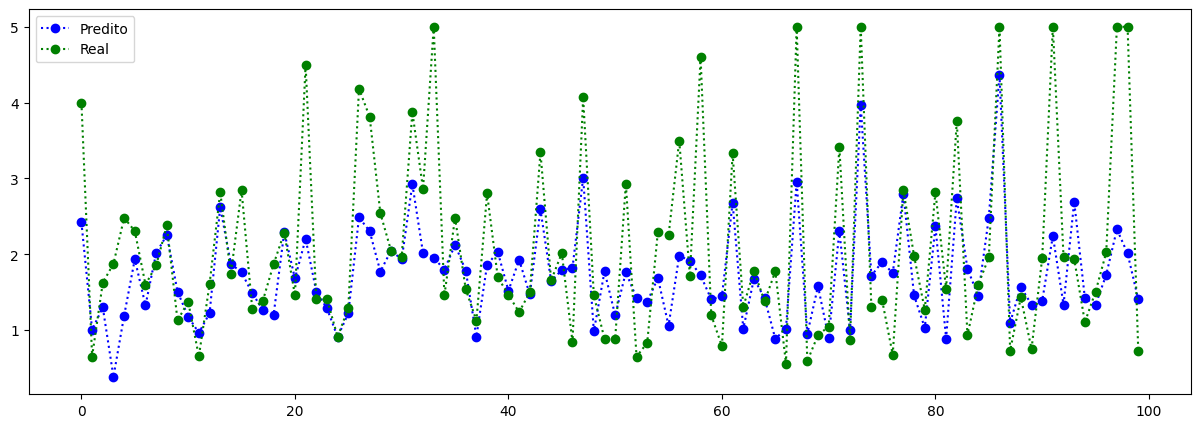

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(preds.numpy()[0:100], marker="o", linestyle="dotted", label="Predito", color="b")
ax.plot(y_test[0:100], marker="o", linestyle="dotted", label="Real", color="g")
ax.legend()

___
# Exercícios
1. Aplique a técnica de minibatch no loop de treinamento feito acima
2. Escolha uma base de dados de classificação e aplique uma regressão logística utilizando o que foi aprendido nesse notebook
    - Dicas:
        - Você precisa adicionar uma sigmoid no final da regressão linear
        - Você precisa alterar a função de perda para lidar com problema de classificação
___

In [53]:
import numpy as np

num_epochs = 10000

for epoch in range(num_epochs):
    inputs = torch.from_numpy(X_train_norm).float()
    targets = torch.from_numpy(y_train).float()
    
    # Fazendo a forwardpass
    outputs = reg_model(inputs)
    error = loss_func(outputs.flatten(), targets)
    
    # Agora aplicando a backward pass e fazendo a otimização
    optimizer.zero_grad()
    error.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print (f"Epoch [{epoch+1}/{num_epochs}], MSE: {error.item():.4f}")

Epoch [100/10000], MSE: 0.7524
Epoch [200/10000], MSE: 0.7476
Epoch [300/10000], MSE: 0.7429
Epoch [400/10000], MSE: 0.7385
Epoch [500/10000], MSE: 0.7342
Epoch [600/10000], MSE: 0.7300
Epoch [700/10000], MSE: 0.7260
Epoch [800/10000], MSE: 0.7222
Epoch [900/10000], MSE: 0.7185
Epoch [1000/10000], MSE: 0.7149
Epoch [1100/10000], MSE: 0.7114
Epoch [1200/10000], MSE: 0.7081
Epoch [1300/10000], MSE: 0.7049
Epoch [1400/10000], MSE: 0.7018
Epoch [1500/10000], MSE: 0.6988
Epoch [1600/10000], MSE: 0.6959
Epoch [1700/10000], MSE: 0.6932
Epoch [1800/10000], MSE: 0.6905
Epoch [1900/10000], MSE: 0.6879
Epoch [2000/10000], MSE: 0.6854
Epoch [2100/10000], MSE: 0.6830
Epoch [2200/10000], MSE: 0.6807
Epoch [2300/10000], MSE: 0.6784
Epoch [2400/10000], MSE: 0.6762
Epoch [2500/10000], MSE: 0.6741
Epoch [2600/10000], MSE: 0.6721
Epoch [2700/10000], MSE: 0.6701
Epoch [2800/10000], MSE: 0.6682
Epoch [2900/10000], MSE: 0.6664
Epoch [3000/10000], MSE: 0.6646
Epoch [3100/10000], MSE: 0.6629
Epoch [3200/10000

In [58]:
from sklearn.datasets import load_breast_cancer

# Carregando a base de dados
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=8)

# Normalizando os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Definindo o modelo de regressão logística
input_size = X_train.shape[1]
output_size = 1
logistic_model = nn.Sequential(
    nn.Linear(input_size, output_size),
    nn.Sigmoid()
)

# Definindo a função de perda e o otimizador
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=0.01)

num_epochs = 10000

for epoch in range(num_epochs):
    inputs = torch.from_numpy(X_train_norm).float()
    targets = torch.from_numpy(y_train).float()
    
    # Fazendo a forwardpass
    outputs = logistic_model(inputs)
    error = loss_func(outputs.flatten(), targets)
    
    # Agora aplicando a backward pass e fazendo a otimização
    optimizer.zero_grad()
    error.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {error.item():.4f}")

# Fazendo predições no conjunto de teste
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test_norm).float()
    preds = logistic_model(test_inputs).squeeze()

# Calculando a perda no conjunto de teste
test_error = loss_func(preds, torch.from_numpy(y_test).float())
print(f"Test Loss: {test_error.item():.4f}")

# Avaliando a acurácia
predicted_labels = preds.round().numpy()
accuracy = (predicted_labels == y_test).mean()
print(f"Test Accuracy: {accuracy:.4f}")

Epoch [100/10000], Loss: 0.2553
Epoch [200/10000], Loss: 0.1901
Epoch [300/10000], Loss: 0.1619
Epoch [400/10000], Loss: 0.1453
Epoch [500/10000], Loss: 0.1340
Epoch [600/10000], Loss: 0.1257
Epoch [700/10000], Loss: 0.1193
Epoch [800/10000], Loss: 0.1142
Epoch [900/10000], Loss: 0.1099
Epoch [1000/10000], Loss: 0.1063
Epoch [1100/10000], Loss: 0.1032
Epoch [1200/10000], Loss: 0.1006
Epoch [1300/10000], Loss: 0.0982
Epoch [1400/10000], Loss: 0.0961
Epoch [1500/10000], Loss: 0.0942
Epoch [1600/10000], Loss: 0.0925
Epoch [1700/10000], Loss: 0.0909
Epoch [1800/10000], Loss: 0.0895
Epoch [1900/10000], Loss: 0.0881
Epoch [2000/10000], Loss: 0.0869
Epoch [2100/10000], Loss: 0.0858
Epoch [2200/10000], Loss: 0.0848
Epoch [2300/10000], Loss: 0.0838
Epoch [2400/10000], Loss: 0.0829
Epoch [2500/10000], Loss: 0.0820
Epoch [2600/10000], Loss: 0.0812
Epoch [2700/10000], Loss: 0.0804
Epoch [2800/10000], Loss: 0.0797
Epoch [2900/10000], Loss: 0.0790
Epoch [3000/10000], Loss: 0.0783
Epoch [3100/10000],